In [1]:
!pip install imageio
import imageio
import numpy as np
import matplotlib.pyplot as plt


Histogram equalization
===

Original image
---

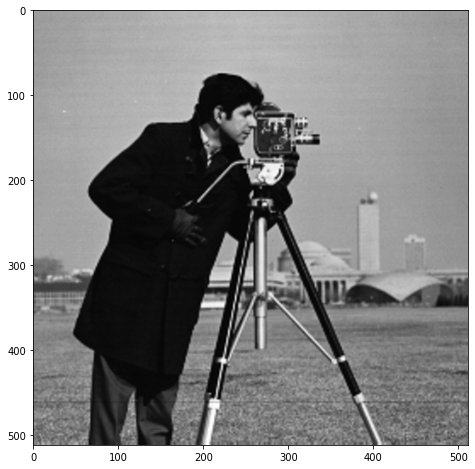

In [2]:

img = imageio.imread('../images/cameraman.png')
nd_img = np.array(img)

plt.figure(figsize=(10,8))
plt.imshow(img, cmap='gray')
plt.show()

Original image histogram
---

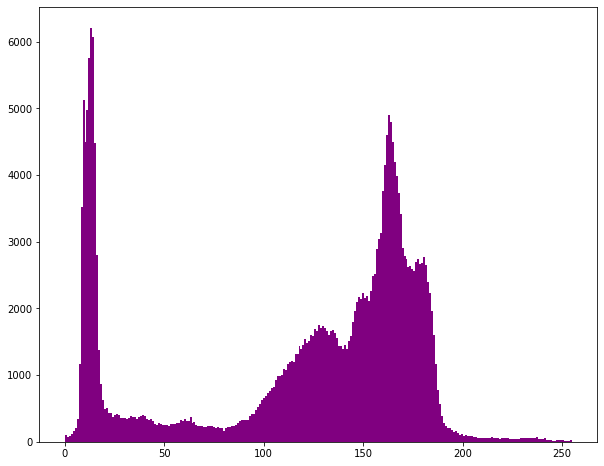

In [3]:
values = nd_img.flatten()

plt.figure(figsize=(10,8))
plt.hist(values, bins=256, color="purple")
plt.show()

Cumulative plot
---

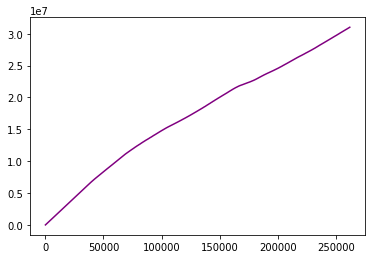

In [4]:
cs = np.cumsum(nd_img.flatten())

plt.figure()
plt.plot(cs, color='purple')
plt.show()

Cumulative normalized plot
---

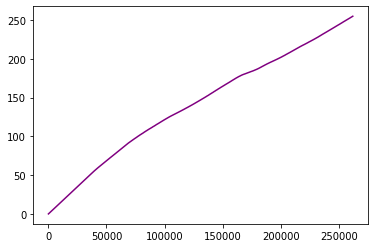

In [5]:
cs = np.cumsum(nd_img.flatten())

cs_normalized = 255 * (cs - cs.min()) / (cs.max() - cs.min())

plt.figure()
plt.plot(cs_normalized, color='purple')
plt.show()


Histogram equalization example
---

In [ ]:
def histogram(arr, bins):
    hist = np.zeros(shape=(bins,))
    for pixel in arr:
        hist[pixel] += 1
    return hist

def histogram_equalization_img(img):
    # First flatten the original image
    img_flatten = np.array(img).flatten()

    # Get the histogram of that image
    hist = histogram(img_flatten, bins=256)

    # Get the cumsum
    cs = np.cumsum(hist)

    # Normalized the cumsum
    delta = cs.max() - cs.min()
    hist_eq = 255 * (cs - cs.min()) / delta

    # Return the good shaped image with replaced pixel values
    return hist_eq[img_flatten].reshape(img.shape)

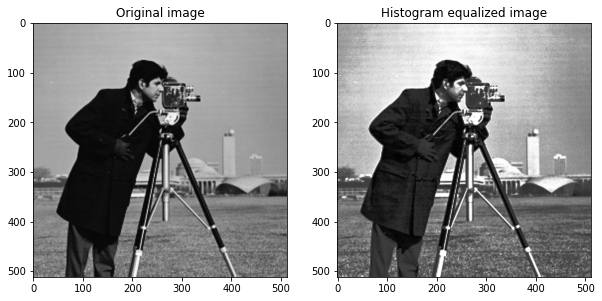

In [7]:
fig, (axL, axR) = plt.subplots(figsize=(10,8), ncols=2, nrows=1)
axL.set_title('Original image')
axL.imshow(img, cmap='gray')
axR.set_title('Histogram equalized image')
axR.imshow(histogram_equalization_img(img), cmap='gray')
plt.show()

